# 143. Reorder List

### Difficulty: <font color = orange> Medium </font>

---

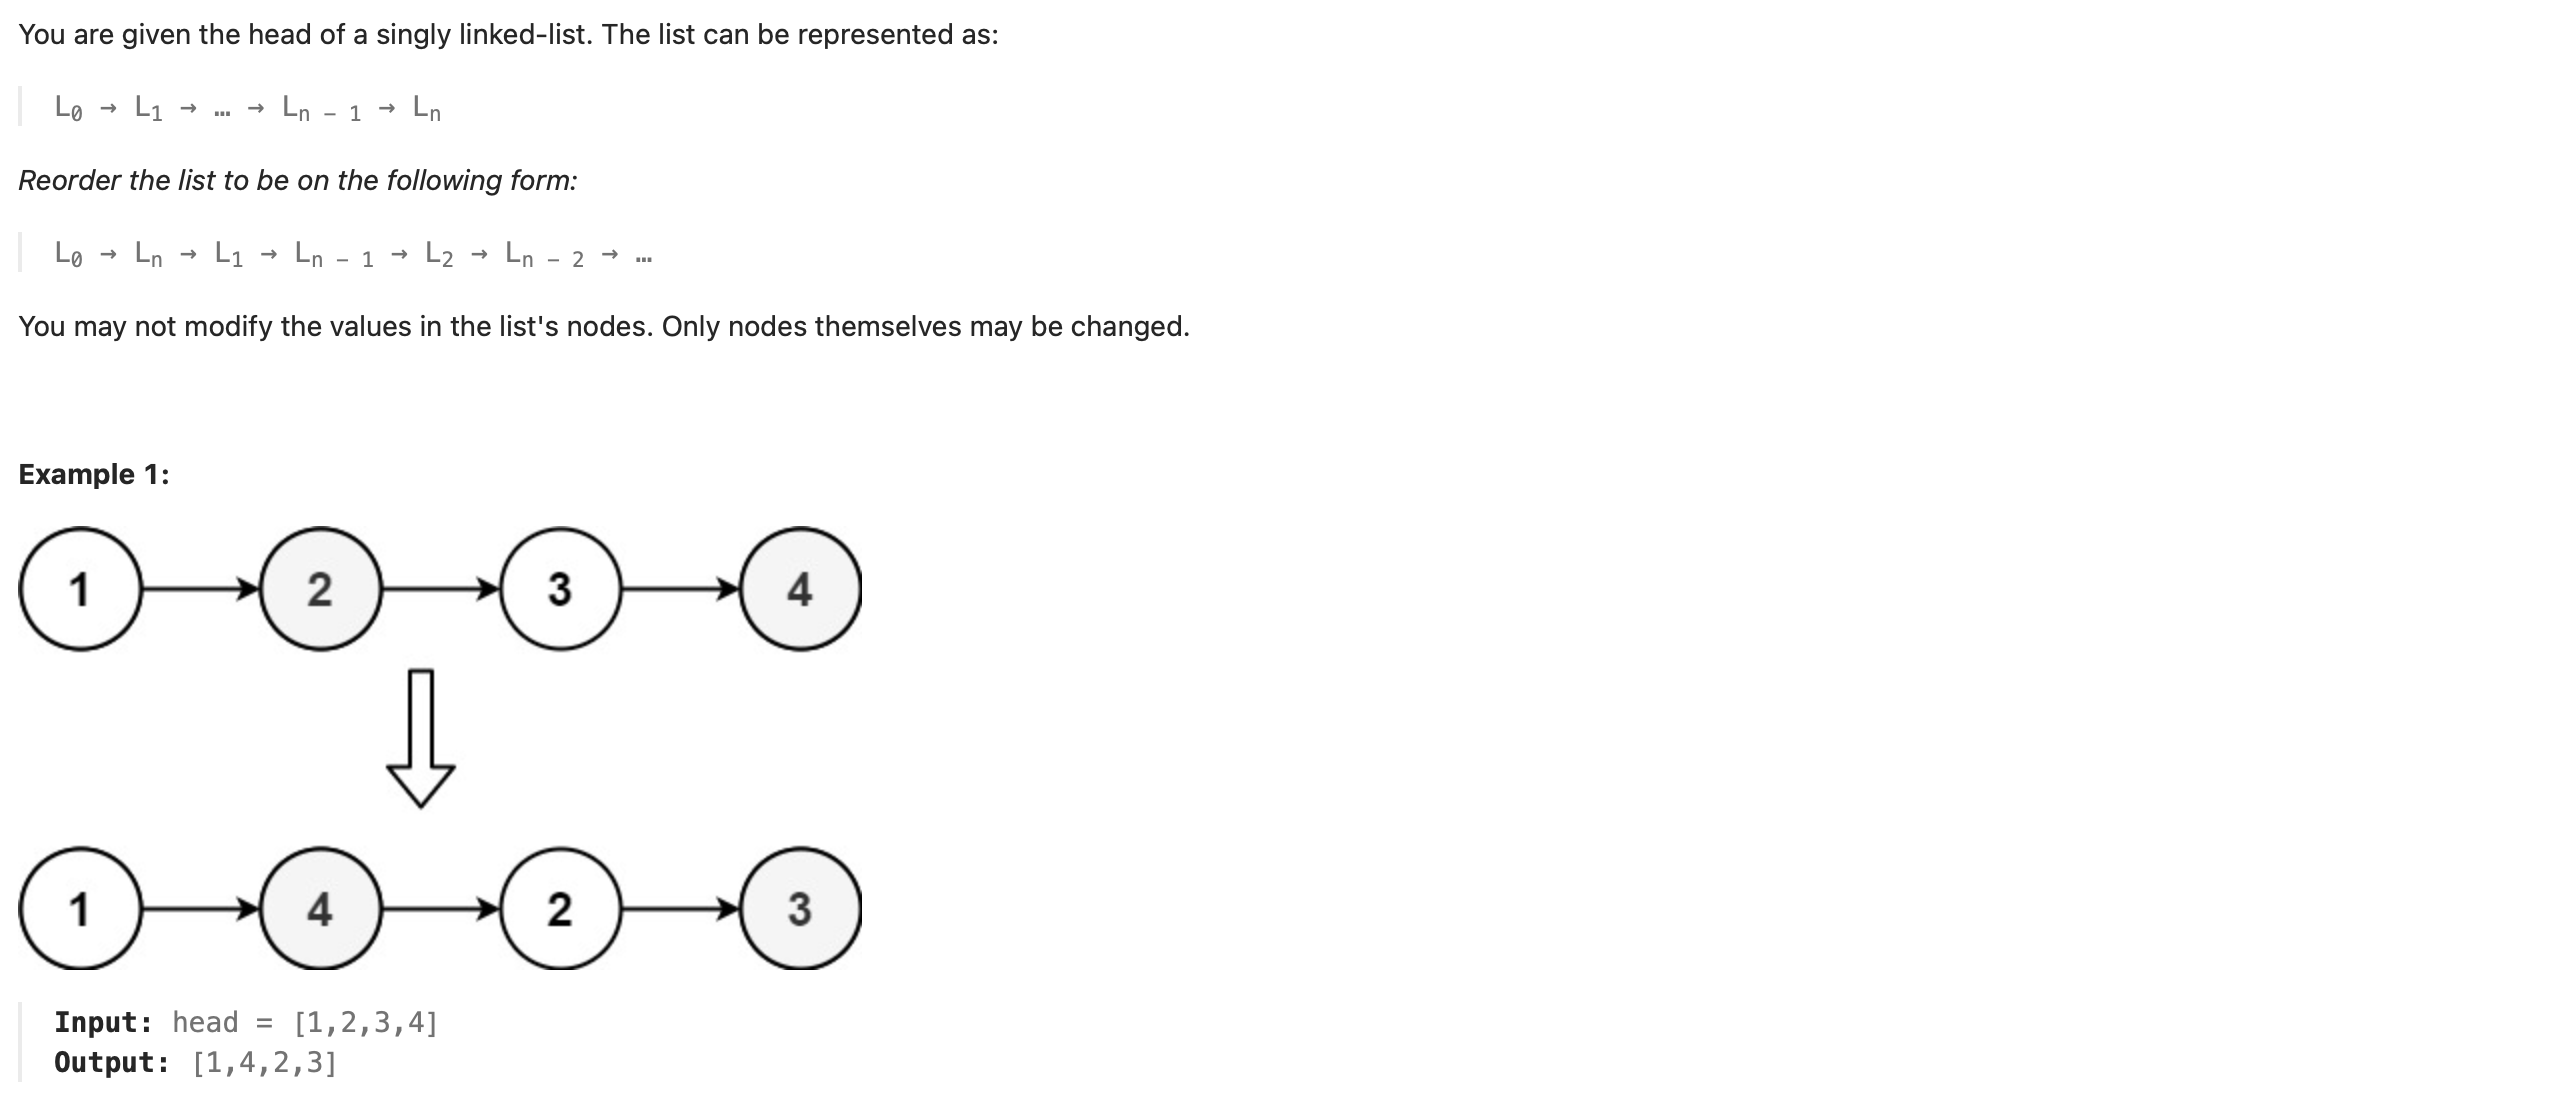

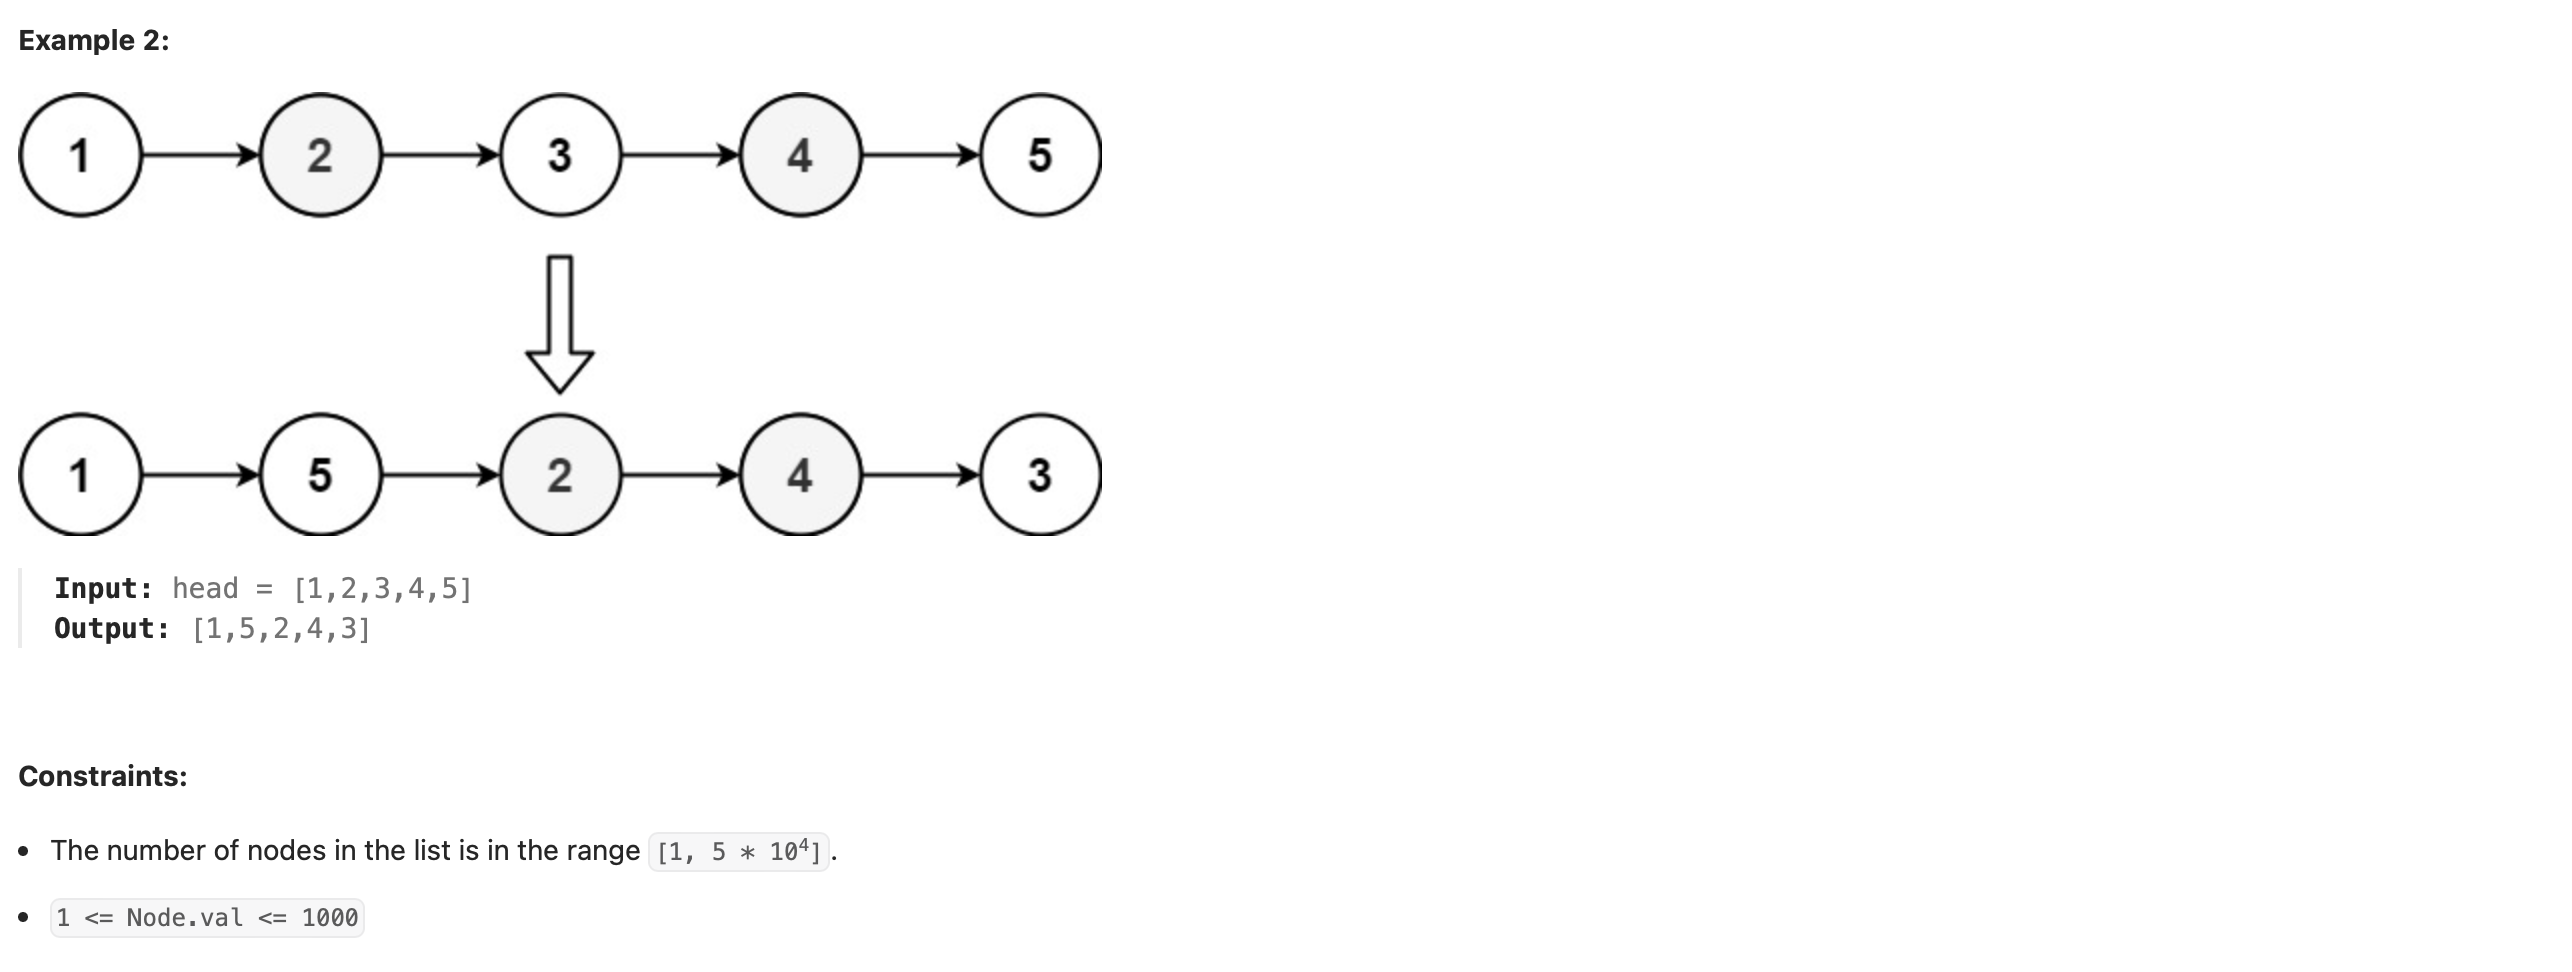

## Approach Overview:

We first split the list into two halves, we then reverse the second half and lastly loop through the nodes in the first and second halves to swap / re-order them accordingly.

GPT Version:

To reorder the list, we first split it into two halves using the slow and fast pointer method, where the slow pointer finds the midpoint. Next, we reverse the second half of the list. Finally, we merge the two halves by alternating nodes from the first half with nodes from the reversed second half, reordering the list as required.

## Detailed Explanation:

OKAY so conceptually this solution was simple but the implementation was quite technically challenging. You had use a few different tricks like splitting the list into two halves using two pointers to facilitate the re-ordering.

Let's explain.

##### Using Two Pointers to Find the Middle and Split the List

So first off we had to split the input list into two halves inorder to facilitate this reordering operation. 

To split it we use two pointers (one slow and one fast) to find the middle of the list. 

Initially both pointers start at the head node. Then we move the **slow pointer** by one step and the **fast pointer** by two steps until the **fast pointer** either reaches or exceeds the end of the input list.
In the end, the **slow pointer** will always be pointing to the middle node in the list.

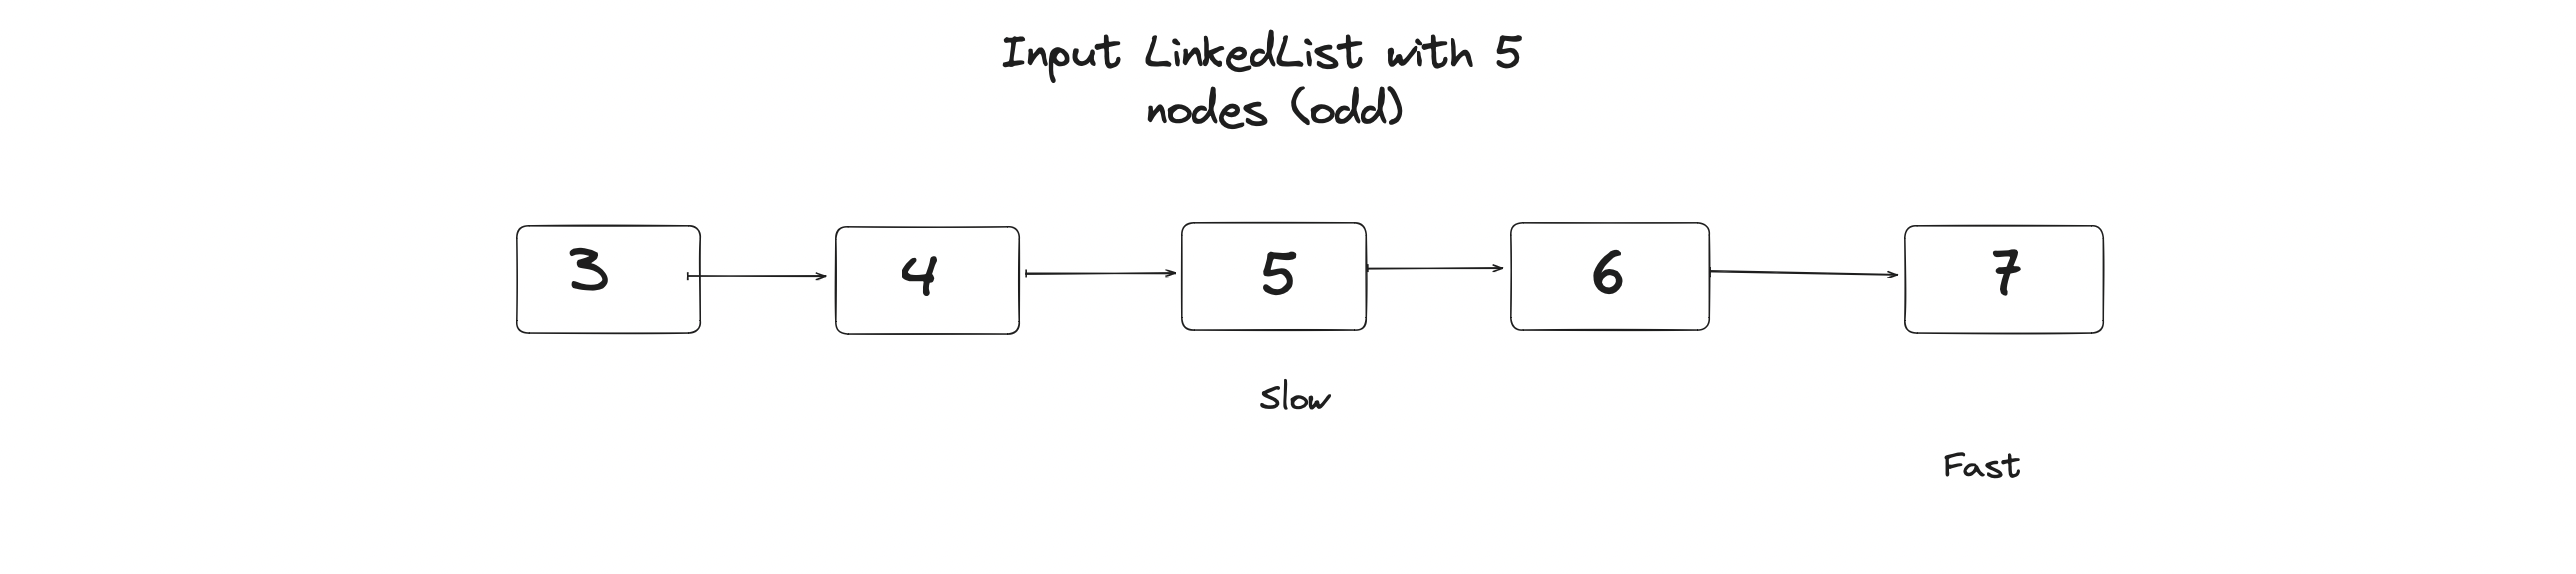

We then split the list into two halves:

We achieve this by setting the pointers in the last node in the first and second list to **NULL**.

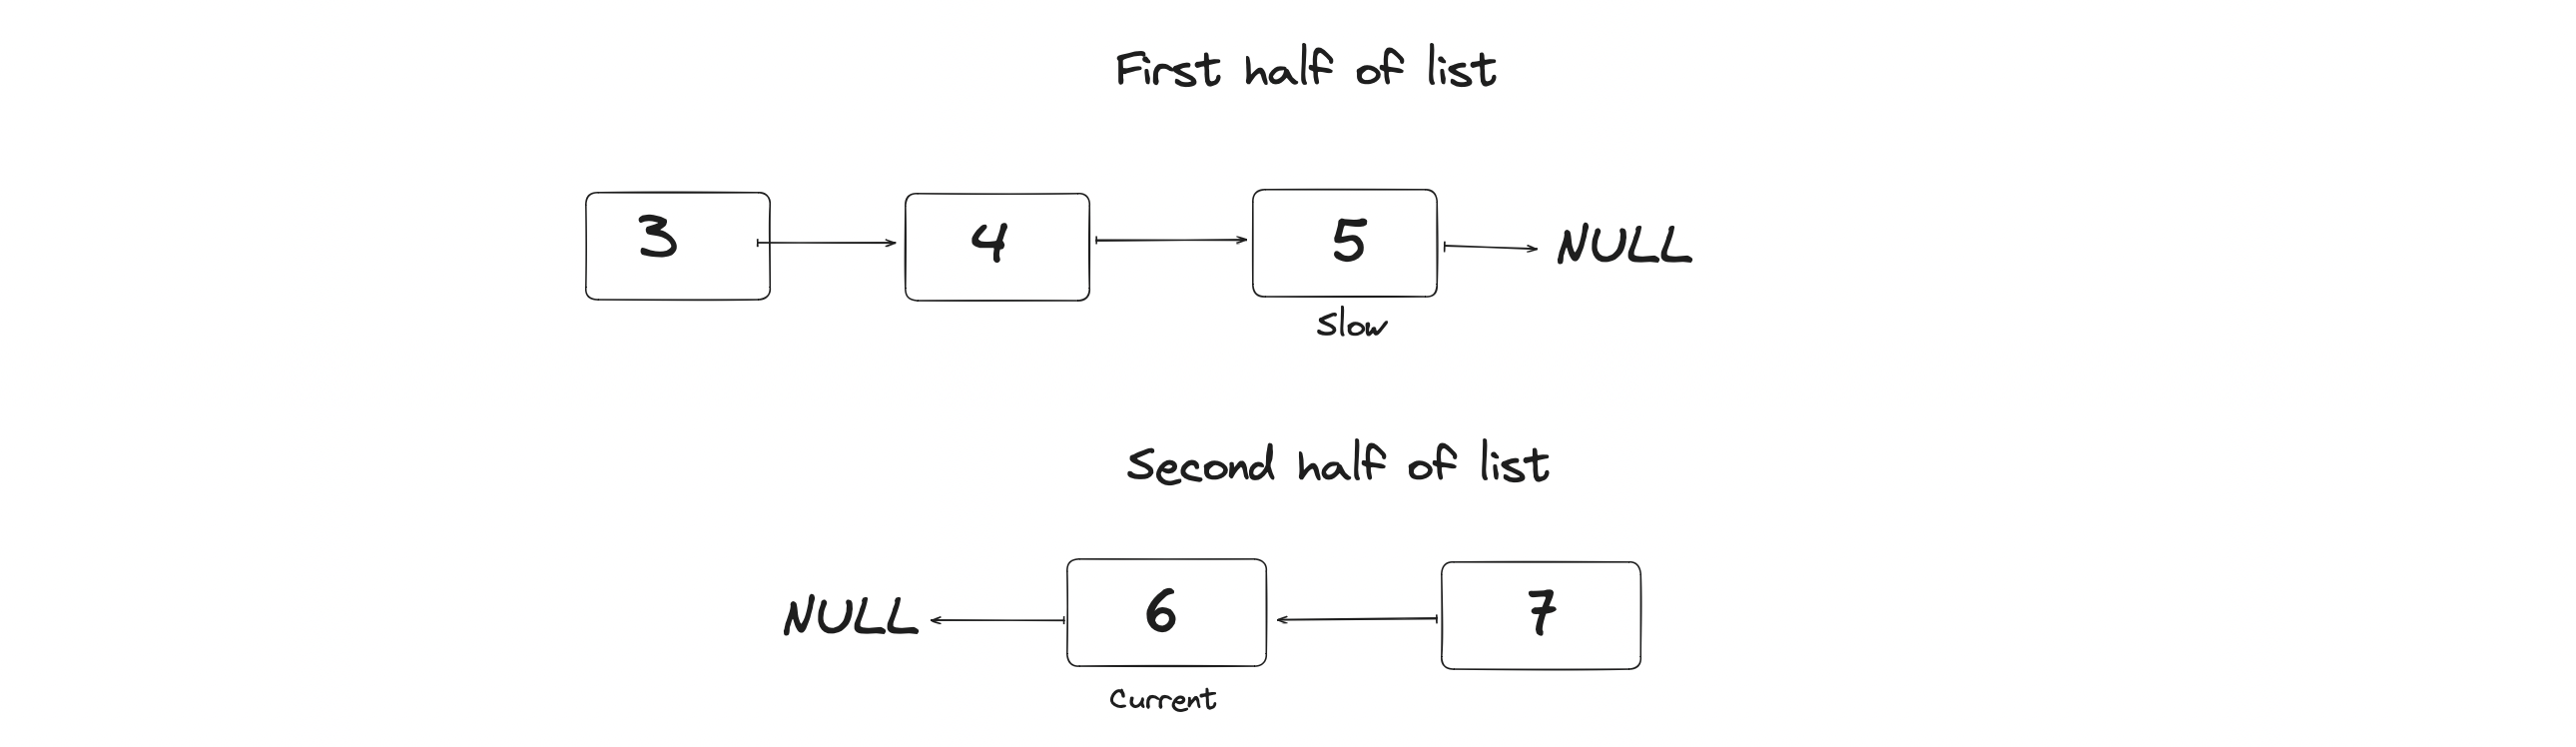

##### Reversing the Second Half

And now we have to reverse the second half of the list. This involves re-linking the nodes so that the last node (7 in our example) becomes the first (becomes the head).

We then use three pointer variables (`current`, `previous`, and `tmp`) to reverse the second half of the list.

`current` starts at the first node of the second half, while `previous` is set to **None** to mark the new end of the list. 

We then iterate through the second half using **while current:**, in each iteration, we temporarily store the next node using `tmp = current.next`, point the current node to **previous**, and then move **previous** and **current** forward.

After completing this process, the second half is reversed, and looks like this.

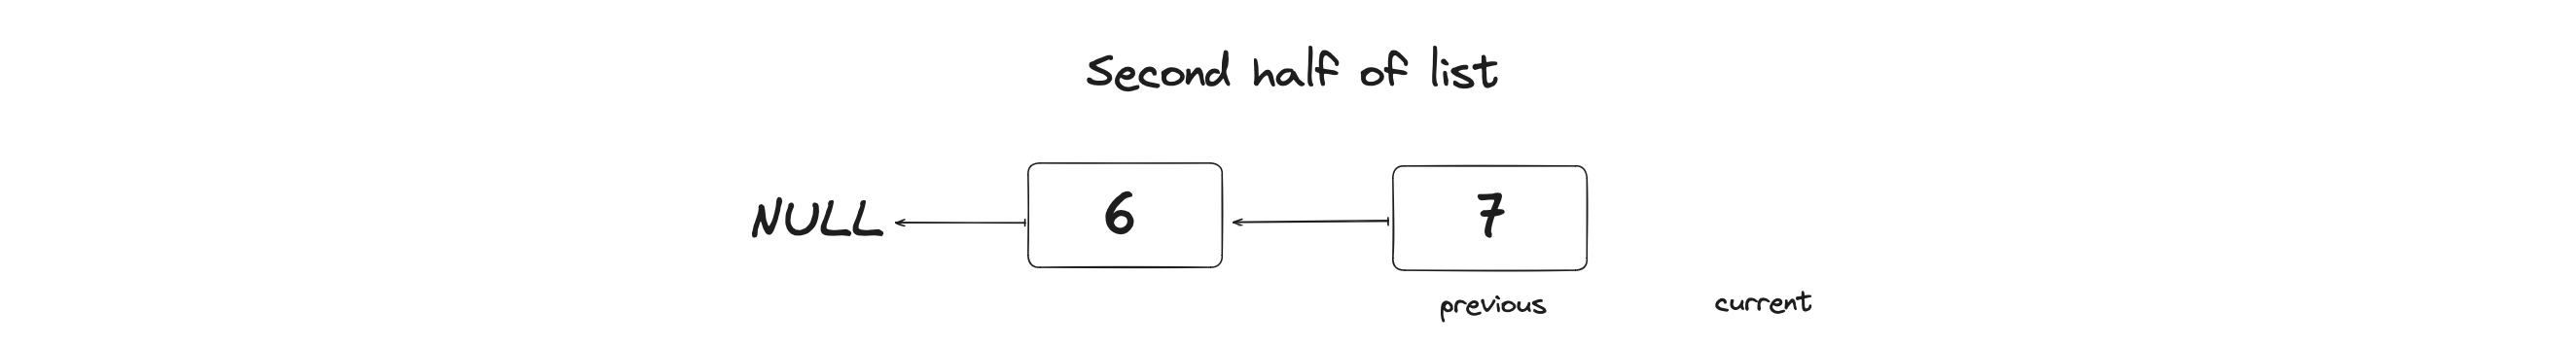

##### Merging the Two Halves 

Finally we merge the nodes from the first and the reversed second half in an alternating fashion. Start with the first node of the first half, then the first node of the second half, and so on.

This reordering continues until all nodes are appropriately merged, achieving the desired list order.

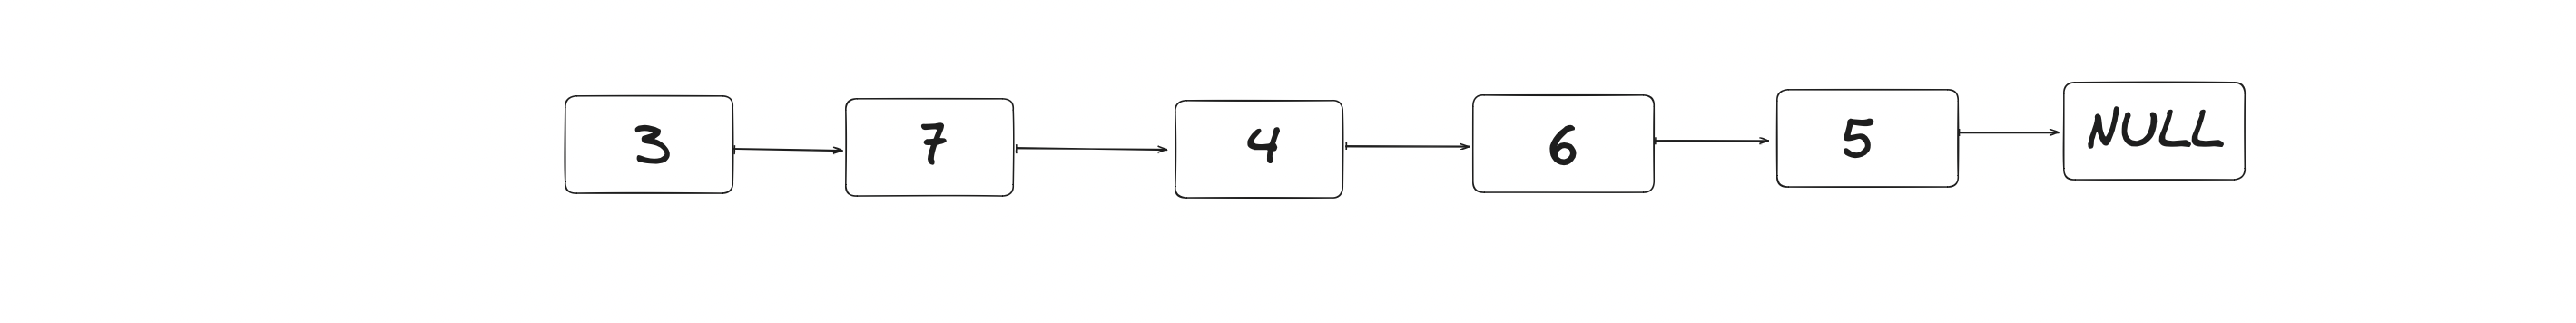

## Key Challenges:

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reorderList(self, head: Optional[ListNode]) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        
        # initialize pointers for the list traversal
        current = slowPointer = fastPointer = head

        # use the slow and fast pointer technique to find the middle of the list 
        while fastPointer and fastPointer.next:
            
            # increment slowPointer by one 
            slowPointer = slowPointer.next
            # increment fastPointer by two 
            fastPointer = fastPointer.next.next 
        
        # current now points to the start of the second half of the list
        current = slowPointer.next

        # set the pointer of the end node in the first list to None
        slowPointer.next = None
        
        # initialize previous to None
        previous = None
        
        # reverse the second half of the list
        # loop until we exceed the bounds of the second list
        while current:
            
            # store the next node in the tmp variable
            tmp = current.next
            # set the pointer of the current node to previous
            current.next = previous
            # set previous to current node
            previous = current
            # move the next node 
            current = tmp
        
        # initialize first pointer to head node of first list
        first = head
        # initialize second pointer to tail node of second list
        second = previous
        
        # continue to re-order the list until we exceed the bounds of the first list 
        while second:
            
            # store the next nodes in the first and second list
            tmp1, tmp2 = first.next, second.next
            # Link current node of the first half to the current node of the second half
            first.next = second
            # Link current node of the second half to the next node of the first half
            second.next = tmp1
             
            first = tmp1   # Move to the next node in the first half
            second = tmp2  # Move to the next node in the second half    